# Dataprosessering
Denne innleveringen omhandler innlesing, tolkning og manupulering av data. Data finnes i
mange ulike formater, f.eks. databaser, tabeller, lyd, bilde, osv., men i denne
innleveringen skal vi fokusere på to typiske formater for lagring av data i tekstformat
(CSV og JSON), og på lagring av data i form av "arrays". 

Denne innleveringen har 7 oppgaver til sammen. Avhengig av hvor mye erfaring du har med
innlesing fra fil, nøstede datastrukturer, vektorer/matriser, og NumPy, kan oppgavene
oppleves lette eller vanskeligere. Dersom du synes det er vanskelig: Gjør et ærlig
forsøk, og hvis du ikke fikk det til, skriv en kort kommentar om hva du har prøvd og
hvordan det gikk (du kan opprette en ny markdown-celle for å gjøre dette).  

Som for tidligere innleveringer er denne notebooken en miks av oppgavetekst, startkode
og tester som sjekker om koden du implementerer fungerer (ipytest). Temaene for
oppgavene er gjennomgått i videoer som hører til denne modulen.  

Vi importerer først bibliotekene vi skal bruke. Merk at veldig mange "data
science"-eksempler bruker Pandas-biblioteket for å lese inn data i tekstformat. Det skal
vi ikke gjøre her - vi bruker heller `csv`- og `json`-modulene som er "innebygget" i
Python. Hensikten med dette er å få en bedre intuisjon for hvordan konverteringen fra
tekst foregår. 

In [163]:
# Imports (don't add extra imports, like e.g. pandas)
import csv
import json
import ipytest
import numpy as np  # Standard short name for NumPy
from pathlib import Path
from numpy.typing import NDArray
import matplotlib.pyplot as plt


In [164]:
# Set up pytest for Jupyter notebooks
ipytest.autoconfig()

## Oppgave 1: Opprette array og finne gjennomsnitt
Skriv kode som oppretter et NumPy-array som heter `X` og som inneholder verdiene vist
under. Bruk funksjonen `np.mean()` til å regne ut 
1. Gjennomsnittsverdien for hele arrayet
2. Gjennomsnittsverdiene for hver kolonne

Bruk `print` for å skrive ut hele arrayet, samt svarene på alle spørsmålene over. (Tips:
Finn NumPy-dokumentasjonen og sjekk ut argumentet "`axis`" for `np.mean()`).

$$ X = \begin{bmatrix} 14.2 & 75.3 & 2.3 \\ 12.7 & 133.5 & 5.9 \\ 18.8 & 54.0 & -1.1
\\ 8.4 & 109.9 & 3.1 \\ \end{bmatrix} $$

In [165]:
# Add your code here
X = np.array([[14.2, 75.3, 2.3], [12.7, 133.5, 5.9], [18.8, 54.0, -1.1], [8.4, 109.9, 3.1]])
print(X.mean())
print(X.mean(axis=0))

36.416666666666664
[13.525 93.175  2.55 ]


## Oppgave 2: Normalisere data
I maskinlæring og AI brukes ofte data der forskjellige "features" (ting man observerer)
har ulike størrelsesordener. For eksempel: En voksen person er gjerne mellom 1,4 og 2,0
meter høy, og veier mellom cirka 40 og 120 kg. Hvis man bruker disse størrelsene direkte i en
maskinlæringsalgoritme, vil vekt ha en tendens til å "dominere", siden tallene for vekt
er større enn tallene for høyde. Rent matematisk er er også ofte nyttig at verdiene er
små (gjerne med absoluttverdier mellom 0 og 1), og at de er "sentrert" rundt null, dvs.
at gjennomsnittsverdien er null. 

Vi kan normalisere ulike verdier gjennom å beregne såkalt
["Z-score"](https://en.wikipedia.org/wiki/Standard_score), også kalt "standard score".

$$z = \frac{x-\mu}{\sigma}$$

der $x$ er den opprinnelige verdien, $\mu$ er gjennomsnittsverdien, og $\sigma$ er
standardavviket. Merk at Z-score må beregnes for hver enkelt type observasjon, dvs. for
hver kolonne i datasettet. Metoden fungerer best når datasettet følger en
normalfordeling, men fungerer også fint for mange andre fordelinger.

Hvis en person veier $x$=60 kg, gjennomsnittsvekten i datasettet
er $\mu$=70 kg, og standardavviket er $\sigma$=20 kg, er z-score for denne vekten

$$z = \frac{60 - 70}{20} = \frac{-10}{20} = -0.5$$

*Implementer en funksjon som normaliserer en matrise med data gjennom å beregne Z-score
for hver kolonne. Bruk NumPy-funksjoner og matematiske operasjoner som opererer på hele
arrayet (unngå å "loope over datasettet", om du kan). Normaliser kun kolonnene som er
indikert med det boolske arrayet norm_col.*


In [166]:
def normalize_data_zscore(X: NDArray, norm_col: NDArray) -> NDArray:
    """Normalize data columns by subtracting mean and dividing by std.dev. ("z-score")

    Parameters
    ----------
    X: NDArray
        Numpy array (matrix) with numerical data, shape (n_samples, n_features)
    norm_col: NDarray
        Boolean vector, shape (n_features,).
        Set norm_col[i] = True to indicate that column i should be normalized.

    Returns
    -------
    X_norm
        Normalized version of X. In columns indicated by norm_col, the mean column value
        is first subtracted, and the resulting value is scaled by dividing with the
        column standard deviation.

    Notes
    -----
    Numpy methods np.copy, np.mean() and np.std() could be useful.
    See also https://en.wikipedia.org/wiki/Standard_score
    """
    X_norm = X.copy()

    mean = np.mean(X, axis=0) * norm_col
    std = np.std(X, axis=0) * norm_col
    std[std == 0] = 1
    X_norm -= mean
    X_norm /= std

    return X_norm

In [167]:
%%ipytest


def test_normalize_data_zscore():
    """Test Z-score normalization of specific columns in dataset"""
    X = np.array(
        [[73.0, 61.0, 18.0], [27.0, 76.0, 63.0], [22.0, 88.0, 56.0], [70.0, 43.0, 83.0]]
    )
    col_norm = np.array([True, False, True])
    X_norm = normalize_data_zscore(X, col_norm)
    assert np.allclose(
        X_norm,
        np.array(
            [
                [1.05975976, 61.0, -1.57127047],
                [-0.8901982, 76.0, 0.33973416],
                [-1.10215015, 88.0, 0.04246677],
                [0.93258859, 43.0, 1.18906955],
            ]
        ),
    )

.                                                                                            [100%]
1 passed in 0.01s


# Oppgave 3: Lese CSV-fil
Skriv kode som leser data fra fila `winequality-white.csv` (i mappa `datasets`) og returnerer en liste med
overskrifter for hver kolonne, og en "liste av lister" med de numeriske dataene, der
hvert element i lista tilsvarer en rad (en linje) i tekstfila.

Merk: Bruk klasser / funksjoner fra `csv`-modulen.

In [168]:
def read_dataset_csv(
    csv_file_path: Path | str,
    delimiter: str,
) -> tuple[list[str], list[list[str]]]:
    """Read dataset saved as CSV text file

    Parameters
    ----------
    csv_file_path: Path | str
        Path to CSV file
    delimiter: str
        String symbol(s) indicating separation between columns

    Returns
    -------
    header: list[str]
        List with header text for each column in dataset

    data: list[list[str]]]
        Nested list with numeric data from dataset.
        Each element is a list corresponding to a row in the dataset.
        Each element of the "inner list" is a string(!) with the data
        for a given row and column.
    """
    csv_data = []
    with open(csv_file_path) as csvfile:
        csvreader = csv.reader(csvfile, delimiter=delimiter)
        for line in csvreader:
            csv_data.append(line)
    header = csv_data[0]
    data = csv_data[1:]
    return header, data

In [169]:
%%ipytest


def test_read_dataset_csv_1():
    header, data = read_dataset_csv("datasets/winequality-white.csv", ";")
    assert len(header) == 12
    assert header[5] == "free sulfur dioxide"
    assert header[11] == "quality"
    assert len(data) == 4898
    assert len(data[0]) == 12
    assert data[42][0] == "7"
    assert data[42][7] == "0.9954"


def test_read_dataset_csv_3():
    header, data = read_dataset_csv("datasets/palmer_penguins.csv", ",")
    assert header == [
        "species",
        "island",
        "culmen_length_mm",
        "culmen_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
        "sex",
    ]
    assert len(data) == 344
    assert len(data[0]) == 7
    assert data[42] == ["Adelie", "Dream", "36", "18.5", "186", "3100", "FEMALE"]


..                                                                                           [100%]
2 passed in 0.02s


## Oppgave 4: Lese og normalisere data fra CSV-fil
Implementer en funksjon som 
- leser inn datasettet som er lagret i `datasets/winequality-white.csv`
- konverterer datasettet til et NumPy-array med datatype `np.float32`
- normaliserer alle verdiene (Z-score) *unntatt* den siste kolonna ("quality")

Bruk gjerne funksjonene som du allerede har implementert over (unngå klipp-og-lim, om du
kan).

In [170]:
def read_normalize_wine_quality(
    wine_quality_csv_path: Path | str = "datasets/winequality-white.csv",
) -> tuple[list[str], NDArray]:
    """Read and normalize wine quality dataset

    Returns
    -------
    header: list[str]
        List of column headers
    X_norm: NDArray[np.float32]
        Normalized version of wine quality dataset
        Shape (n_samples, n_features)
        Last column ("quality") is NOT normalized
    """
    header, data = read_dataset_csv(wine_quality_csv_path, ";")
    data = np.array(data, dtype=np.float32)
    norm_col = np.array([True] * (len(header) - 1) + [False])
    X_norm = normalize_data_zscore(data, norm_col)
    return header, X_norm

In [171]:
%%ipytest

# Jeg måtte skru opp toleransen på allclose testene litt. Vet ikke hvorfor forskjellene var for store for å bestå med default verdi.


def test_read_normalize_wine_quality():
    header, X_norm = read_normalize_wine_quality("datasets/winequality-white.csv")
    assert header == [  'fixed acidity', 'volatile acidity', 'citric acid', 
                        'residual sugar', 'chlorides', 'free sulfur dioxide', 
                        'total sulfur dioxide', 'density', 'pH', 
                        'sulphates', 'alcohol', 'quality']  # fmt: skip
    assert X_norm.shape == (4898, 12)
    assert np.allclose(X_norm[0], np.array([ 
        0.17209677, -0.08176959,  0.21328036,  2.8213494,  -0.03535487,  0.56993145,
        0.74456507,  2.3315275,  -1.2469205,  -0.34918445, -1.3931531,   6.        ]), atol=1e-03)  # fmt: skip
    assert np.allclose(X_norm[2048], np.array([
        -0.06493103,  0.5135615,   0.87439656,  0.12000002,  0.19352268, -0.37094605,
         0.39157180,  0.49242657, -0.31967650, -0.61207900, -0.82427645,  5.        ]), atol=1e-03)  # fmt: skip


.                                                                                            [100%]
1 passed in 0.03s


## Oppgave 5: Lese JSON-fil
Implementer en funksjon som leser inn informasjon om Nobelprisen fra JSON-fila
`datasets/nobel_prize.json`, og som returnerer en liste over alle Nobelprisvinnerne
innenfor et gitt fagfelt, i kronologisk rekkefølge. 

Merk at JSON-fila utgjør en dypt "nøstet" struktur, som oversettes til en dictionary med
inneholder mange nivåer av dictionaries og lister når den leses inn. Du må selv skaffe
deg oversikt over datastrukturen og hente ut informasjonen du trenger. 


In [172]:
def nobel_laureates(json_file_path: Path | str, category: str) -> list[str]:
    """Return full name of all Nobel prize winners (laureates) in given category

    Parameters
    ----------
    json_file_path: Path | str
        Path to JSON file (str or pathlib.Path) with Nobel prizes
    category: str
        String indicating Nobel prize category
        (e.g. 'medicine' or 'literature')

    Returns
    -------
    winners: str
        List of full names for every Nobel prize winner in given category, ordered
        chronologically from first to last. In years with multiple winners, winners are
        listed in the same order as they are listed in the JSON file. Example for
        literature: (['Sully Prudhomme', ..., 'Jon Fosse'])
    """
    with open(json_file_path) as file:
        nobel_prize = json.loads(file.read())
    prizes = []
    for prize in nobel_prize["prizes"]:
        if prize["category"] == category:
            prizes.append(prize)
    winners = []
    for prize in prizes[::-1]:
        if "laureates" in prize.keys():
            for person in prize["laureates"]:
                winners.append(person["firstname"] + " " + person["surname"])

    return winners

In [173]:
%%ipytest


def test_nobel_laureates_1():
    names = nobel_laureates("datasets/nobel_prize.json", "literature")
    assert len(names) == 120
    assert names[0] == "Sully Prudhomme"
    assert names[19] == "Knut Hamsun"
    assert names[-1] == "Jon Fosse"


def test_nobel_laureates_2():
    names = nobel_laureates("datasets/nobel_prize.json", "physics")
    assert len(names) == 225
    assert names[0] == "Wilhelm Conrad Röntgen"
    assert names[5] == "Marie Curie"
    assert names[-2] == "Ferenc Krausz"


def test_nobel_laureates_3():
    names = nobel_laureates("datasets/nobel_prize.json", "medicine")
    assert len(names) == 229
    assert names[0] == "Emil von Behring"
    assert names[189] == "Harald zur Hausen"
    assert names[-1] == "Gary Ruvkun"

...                                                                                          [100%]
3 passed in 0.03s


## Oppgave 6: Implementere klasse for PCA
Fyll ut koden for metodene fit() og transform() for klassen "PCA" under. Koden skal
baseres på beregning av kovariansmatrise for et datasett, og egenverdier og egenvektorer
for denne kovariansmatrisa, som beskrevet i videoer tilhørende denne modulen. Det eneste
eksterne biblioteket som trengs er NumPy. Det er ikke lov å bruke ferdige implementasjoner av PCA. 

In [174]:
class PCA:
    """Class for fitting a PCA model to data and for transforming data

    Attributes
    ----------
    n_components : int
        Number of principal components (eigenvectors with largest eigenvalues) to use
    mean: NDArray, shape (n_samples,)
        Mean value of each column in data that the model is fitted to
    eigenvalues : NDArray, shape (n_features,)
        Eigenvalues of data covariance matrix, sorted by value (descending)
    eigenvectors : NDArray, shape (n_features, n_features)
        Eigenvectors of data covariance matrix, sorted according to their
        corresponding eigenvalues (descending).
    self.components : NDArray, shape (n_features, n_components)
        The n_components first eigenvectors, corresponding to the largest eigenvalues
        (i.e. the directions in data space with most variance)
    """

    def __init__(self, n_components: int):
        """Initialize PCA object

        Parameters
        ----------
        n_components : int
            Number of principal components (eigenvectors with largest eigenvalues) to use

        """
        self.n_components = n_components
        self.mean = None
        self.eigenvalues = None
        self.eigenvectors = None
        self.components = None

    def fit(self, X: NDArray) -> None:
        """Fit PCA model to data matrix

        Parameters
        ----------
        X: NDArray, shape (n_samples, n_features)
            Data matrix used to fit ("train") PCA model

        Notes
        -----
        The fit function calculates and sets the following attributes (see doc. of class
        attriburtes for details):
        - mean
        - eigenvalues
        - eigenvectors
        - components

        """
        self.mean = np.mean(X, axis=0)
        S = np.cov(X, rowvar=False)
        eigenvalues, eigenvectors = np.linalg.eig(S)
        index = np.argsort(eigenvalues)[::-1]
        self.eigenvalues = eigenvalues[index]
        self.eigenvectors = eigenvectors[:, index]
        self.components = self.eigenvectors[:, :self.n_components]

    def transform(self, X: NDArray) -> NDArray:
        """Transform data from original features to PCA component coordinates

        Parameters
        ----------
        X: NDarray, shape (n_samples, n_features)
            Data matrix to be transformed to PCA coordinates
            The matrix can be the same as the matrix used to fit the model,
            or it can be a different matrix with the same type of data
            (same features)

        Returns
        -------
        X_pca: NDArray, shape (n_samples, n_components)
            Matrix with data transformed to principal component coordinates.

        """
        X_pca = X @ self.components
        return X_pca

In [175]:
%%ipytest


def test_pca_fit():
    X = np.random.multivariate_normal(
        mean=[0, -1, 0.5, 2],
        cov=[[1, 0.7, 0, 0], [0.7, 1, 0.3, 0], [0, 0.3, 1, 0.1], [0, 0, 0.1, 1]],
        size=10000,
    )
    pca = PCA(n_components=2)
    pca.fit(X)
    assert np.allclose(pca.mean, [0, -1, 0.5, 2], atol=0.1)
    assert pca.eigenvectors.shape == (4, 4)
    assert np.allclose(np.abs(pca.components[:, 0]), [0.64, 0.70, 0.28, 0.04], atol=0.1)
    assert np.allclose(np.abs(pca.components[:, 1]), [0.27, 0.03, 0.64, 0.71], atol=0.1)


def test_pca_transform():
    X = np.random.multivariate_normal(
        mean=[0, -1, 0.5, 2],
        cov=[[1, 0.7, 0, 0], [0.7, 1, 0.3, 0], [0, 0.3, 1, 0.1], [0, 0, 0.1, 1]],
        size=10000,
    )
    pca = PCA(n_components=2)
    pca.fit(X)
    X_test = np.array([[-0.3, -1.1, 0, 1.5], [0.7, -0.5, 1, 1]])
    X_test_pca = pca.transform(X_test)
    assert X_test_pca.shape == (2, 2)
    # Hard to test exact values because direction of components changes based on random input

..                                                                                           [100%]
2 passed in 0.02s


## Oppgave 7: Les, normalisér og transformer datasett til PCA-koordinater
- Les inn datasettet `datasets/winequality-white.csv`. 
- Opprett en X-matrise som inneholder alle kolonnene unntatt den siste ("quality"-kolonna), og normaliser hver av de 11
featurene i datasettet med z-score. 
- Lag et PCA-objekt basert på klassen du har implementert, og spesifiser at kun 2
  komponenter skal brukes. Bruk fit() for å "trene" PCA-modellen på det normaliserte datasettet.
- Bruk transform() for å transformere datasettet til 2 PCA-koordinater
- Plott det transformerte datasettet med matplotlib (kode for dette er allerede oppgitt under)

In [176]:
# The transformed data matrix should be called X_pca for the plotting below to work
header, data = read_normalize_wine_quality("datasets/winequality-white.csv")
X = [line[:-1] for line in data]
pca = PCA(2)
pca.fit(X)
X_pca = pca.transform(X)

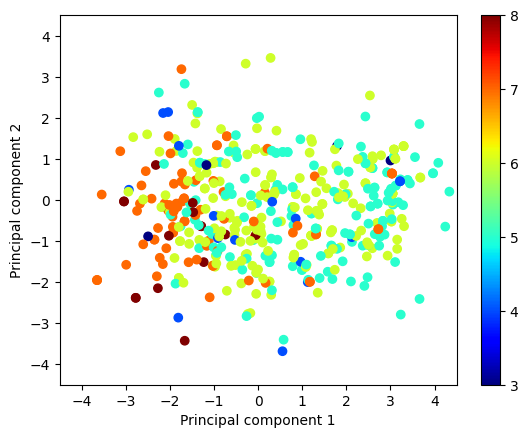

In [177]:
# Plotting av PCA-transformerte verdier
n_plot_points = 500
plt.scatter(
    x=X_pca[0:n_plot_points, 0],
    y=X_pca[0:n_plot_points, 1],
    c=data[0:n_plot_points, -1],  # Use "quality" for coloring data points
    cmap="jet",
)
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.xlim([-4.5, 4.5])
plt.ylim([-4.5, 4.5])
_ = plt.colorbar()

Hvis alt fungerer bør du kunne se at de beste vinene (de som har kvalitet 7 og 8) er
gruppert i den ene enden av aksen som tilsvarer principal component 1. Gratulerer, i så
fall! Her ser man også at PCA kan "komprimere" data (dvs. data spredt over 11 ulike
features), og at visualisering av de første 2 komponentene allerede gir oss interessant informasjon.